In [ ]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19
#Digitos con CNN input=images
#Dividir los datos y luego escalar, el escalador solo se entrena con x_train

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
num_classes = 10
n_samples = len(digits.target)
print(digits.images.shape)
print(digits.target.shape)
print(n_samples)

(1797, 8, 8)
(1797,)
1797


In [3]:
#convertir de 3D a 4D
x = digits.images.reshape((n_samples, 8, 8, 1))
print(x.shape)

(1797, 8, 8, 1)


In [4]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, digits.target)

In [5]:
#escalar los datos para que esten en un rango de 0 a 1
x_train, x_test = x_train / 16.0, x_test / 16.0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 1024, validation_data=(x_test, y_test))

Train on 1347 samples, validate on 450 samples
Epoch 1/200
1347/1347 [==============================] - 2s 1ms/sample - loss: 2.3035 - acc: 0.0772 - val_loss: 2.2845 - val_acc: 0.1533
Epoch 2/200
1347/1347 [==============================] - 0s 19us/sample - loss: 2.2881 - acc: 0.1151 - val_loss: 2.2739 - val_acc: 0.2067
Epoch 3/200
1347/1347 [==============================] - 0s 19us/sample - loss: 2.2734 - acc: 0.1804 - val_loss: 2.2642 - val_acc: 0.2156
Epoch 4/200
1347/1347 [==============================] - 0s 19us/sample - loss: 2.2639 - acc: 0.2101 - val_loss: 2.2543 - val_acc: 0.2911
Epoch 5/200
1347/1347 [==============================] - 0s 20us/sample - loss: 2.2506 - acc: 0.2754 - val_loss: 2.2443 - val_acc: 0.3400
Epoch 6/200
1347/1347 [==============================] - 0s 20us/sample - loss: 2.2393 - acc: 0.3133 - val_loss: 2.2327 - val_acc: 0.3556
Epoch 7/200
1347/1347 [==============================] - 0s 21us/sample - loss: 2.2247 - acc: 0.3563 - val_loss: 2.2194 - val_

1347/1347 [==============================] - 0s 22us/sample - loss: 0.3870 - acc: 0.9005 - val_loss: 0.3530 - val_acc: 0.9133
Epoch 60/200
1347/1347 [==============================] - 0s 22us/sample - loss: 0.3942 - acc: 0.8998 - val_loss: 0.3419 - val_acc: 0.9156
Epoch 61/200
1347/1347 [==============================] - 0s 22us/sample - loss: 0.3629 - acc: 0.9169 - val_loss: 0.3344 - val_acc: 0.9133
Epoch 62/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.3680 - acc: 0.9013 - val_loss: 0.3226 - val_acc: 0.9089
Epoch 63/200
1347/1347 [==============================] - 0s 17us/sample - loss: 0.3521 - acc: 0.9072 - val_loss: 0.3138 - val_acc: 0.9133
Epoch 64/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.3335 - acc: 0.9169 - val_loss: 0.3039 - val_acc: 0.9111
Epoch 65/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.3279 - acc: 0.9198 - val_loss: 0.2918 - val_acc: 0.9244
Epoch 66/200
1347/1347 [================

Epoch 118/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.1124 - acc: 0.9733 - val_loss: 0.1305 - val_acc: 0.9556
Epoch 119/200
1347/1347 [==============================] - 0s 25us/sample - loss: 0.1070 - acc: 0.9703 - val_loss: 0.1318 - val_acc: 0.9533
Epoch 120/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.1069 - acc: 0.9755 - val_loss: 0.1304 - val_acc: 0.9533
Epoch 121/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.1136 - acc: 0.9733 - val_loss: 0.1264 - val_acc: 0.9533
Epoch 122/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.1074 - acc: 0.9755 - val_loss: 0.1257 - val_acc: 0.9578
Epoch 123/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.1022 - acc: 0.9800 - val_loss: 0.1263 - val_acc: 0.9622
Epoch 124/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.0962 - acc: 0.9800 - val_loss: 0.1264 - val_acc: 0.9622
Epoch 125/200
1347/1

1347/1347 [==============================] - 0s 20us/sample - loss: 0.0523 - acc: 0.9859 - val_loss: 0.0970 - val_acc: 0.9667
Epoch 177/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.0553 - acc: 0.9874 - val_loss: 0.0971 - val_acc: 0.9644
Epoch 178/200
1347/1347 [==============================] - 0s 20us/sample - loss: 0.0550 - acc: 0.9859 - val_loss: 0.0979 - val_acc: 0.9644
Epoch 179/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0536 - acc: 0.9881 - val_loss: 0.0972 - val_acc: 0.9622
Epoch 180/200
1347/1347 [==============================] - 0s 21us/sample - loss: 0.0514 - acc: 0.9874 - val_loss: 0.0959 - val_acc: 0.9644
Epoch 181/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0519 - acc: 0.9881 - val_loss: 0.0954 - val_acc: 0.9622
Epoch 182/200
1347/1347 [==============================] - 0s 19us/sample - loss: 0.0543 - acc: 0.9903 - val_loss: 0.0954 - val_acc: 0.9667
Epoch 183/200
1347/1347 [=========

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

450/450 [==============================] - 0s 82us/sample - loss: 0.0919 - acc: 0.9667
Test loss: 0.09191365206717617
Test accuracy: 0.96666664


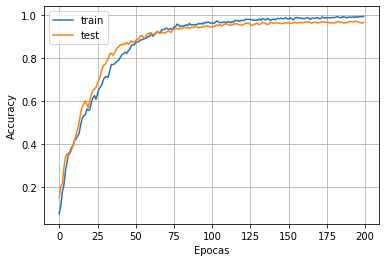

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

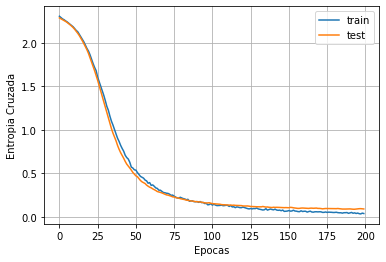

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()